## Dynamic signal timing for AADT data to avoid traffic congestion

In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read the AADT dataset
df = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\aadt.csv')

In [76]:
# Create a function to convert 'location' column value -- POINT(-78.594915 42.728258) into 'lat' 'long' columns
# Here we are using simple string manipulations in Python to extracl lat long values
# We can also use Regex to extract the same
def lat_long(col):
    string = col.split('POINT(')[-1]
    string = string.split(')')[0]
    string = string.split(' ')
    lat = float(string[1])
    long = float(string[0])
    return lat, long

In [94]:
# Create lat long columns into the dataframe using lat_long function
df['lat'], df['long'] = zip(*df['location'].map(lat_long))

In [95]:
df.head()

,local_id,county,municipality,on,from,to,approach,at,direction,aadt_year,aadt,aadt_cars,aadt_trucks,location,lat,long
0,530233,ERIE,AURORA,OLEAN RD,START OLAP RT 400 EXPWY,END OLAP RT 400 EWPWY {CONFLICTS W/OTHER 1090},BETWEEN,NaN,2-WAY,1981-01-01T00:00:00,6550,NaN,NaN,POINT(-78.594915 42.728258),42.728258,-78.594915
1,530064,ERIE,WALES,OLEAN RD,WARNER HILL RD,START OLAP RT 400 EXPWY,BETWEEN,NaN,2-WAY,2001-01-01T00:00:00,12200,NaN,NaN,POINT(-78.57771635 42.70977364),42.709774,-78.577716
2,533061,ERIE,BUFFALO,I-190 @ SOUTH OGDEN ST,NaN,NaN,NaN,GRISWOLD ST TO I-190 SB (ON),RAMP,2009-01-01T00:00:00,6267,5693.0,573.0,POINT(-78.799448 42.875776),42.875776,-78.799448
3,530150,ERIE,BUFFALO,KENSINGTON EXPWY,JEFFERSON AV,BEST ST,BETWEEN,NaN,2-WAY,1977-01-01T00:00:00,47000,NaN,NaN,POINT(-78.84958774 42.89957233),42.899572,-78.849588
4,534497,ERIE,AMHERST,KENSINGTON AVE,CHKTG/AMHERST TOWN LN,RT 240 HARLEM RD,BETWEEN,NaN,2-WAY,1991-01-01T00:00:00,9700,NaN,NaN,POINT(-78.78539912 42.9494342),42.949434,-78.785399


## Read the hourly toll collection at the toll plazaz

In [4]:
# Read the hourly traffic dataset
df2 = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\ahdt.csv')

In [7]:
df2['plaza_id'].value_counts()

9     135552
3     135552
1     130896
2     130896
5     128688
6     128688
7     123072
8     122784
4     120624
11     66000
24     23134
27     23134
28     23134
26     23086
25     22875
29     22120
23     22012
21     14162
22     11567
30     11565
Name: plaza_id, dtype: int64

In [10]:
df2.groupby(['plaza_id', 'direction'])['vehicles_etc_e_zpass', 'vehicles_cash_vtoll'].sum()

vehicles_etc_e_zpass  vehicles_cash_vtoll
plaza_id direction                                           
1        I                      76693512             28020306
         O                      80949574             28600810
2        I                     111306265             21489436
         O                      87072214             18176164
3        I                     118110611             35099499
         O                     127503370             37398487
4        I                      72569914             11713125
         O                      62572341              9684737
5        I                      24260912              4013094
         O                      24342025              3992959
6        I                      24095986              5230696
         O                      22900356              4733539
7        I                      93366296             15407976
         O                      79531658             11178778
8        I                      56226049              8173240
         O                      49878283              6194983
9        I                     127180599             28763742
         O                     132770588             28989775
11       I                     212093356             40282965
21       I                      52019033              7962305
         O                       6194459              1003449
22       O                      17703465              2520928
23       I                      25128450              4313321
         O                      26105544              4137004
24       I                      16255688              1949299
         O                      13989149              1679823
25       I                       4720893               512150
         O                       4793654               435552
26       I                       4709258               632292
         O                       5094436               691195
27       I                      17230096              2485397
         O                      14748830              1830028
28       I                      11349409              1185260
         O                      11249864              1119248
29       I                      22740384              3655781
         O                      25689918              3537322
30       O                      44674788              4599352

In [80]:
# Selecting records for last 5 plazas
data = df2[df2['plaza_id'] > 25] 

In [81]:
# The records for each plaza
data['plaza_id'].value_counts()

28    23134
27    23134
26    23086
29    22120
30    11565
Name: plaza_id, dtype: int64

In [71]:
#data1 = data.groupby(['date', 'plaza_id', 'direction'])['vehicles_etc_e_zpass', 'vehicles_cash_vtoll'].sum()

In [82]:
data

,plaza_id,date,hour,direction,vehicles_etc_e_zpass,vehicles_cash_vtoll
192,26,2019-03-02,0,I,229,35
193,26,2019-03-02,0,O,129,35
194,26,2019-03-02,1,I,153,33
195,26,2019-03-02,1,O,77,20
196,26,2019-03-02,2,I,107,18
...,...,...,...,...,...,...
198800,30,2017-09-03,19,O,4176,529
198801,30,2017-09-03,20,O,4133,547
198802,30,2017-09-03,21,O,3703,506
198803,30,2017-09-03,22,O,3364,498


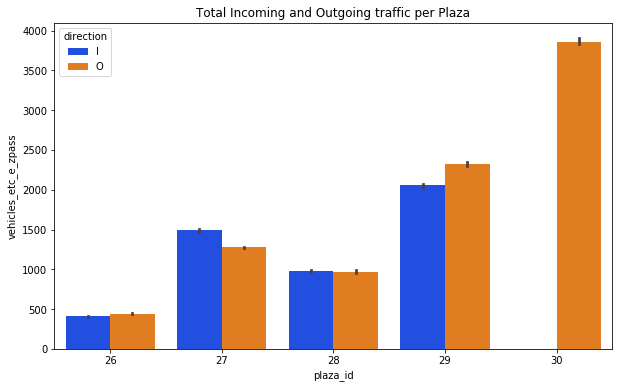

In [108]:
sns.set_palette("bright")
plt.figure(figsize=(10, 6))
sns.barplot(x='plaza_id', hue='direction', y='vehicles_etc_e_zpass', data=data)
plt.title('Total Incoming and Outgoing traffic per Plaza')
plt.show()